<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**: Parmida Oujaghi

**Student ID**: 400100779





## Importing Libraries

First we import libraries that we need for this assignment.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import any other libraries needed below

from sklearn.preprocessing import StandardScaler
from numpy import exp,array
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from scipy.special import expit


## Reading Data and Preprocessing

In this section, we want to read data from a CSV file and then preprocess it to make it ready for the rest of the problem.

First, we read the data in the cell below and extract an $m \times n$ matrix, $X$, and an $m \times 1$ vector, $Y$, from it, which represent our knowledge about the features of the data (`X1`, `X2`, `X3`) and the class (`Y`), respectively. Note that by $m$, we mean the number of data points and by $n$, we mean the number of features.

In [2]:
X, Y = None, None

### START CODE HERE ###
df = pd.read_csv('data_logistic.csv')
X, Y = df.iloc[:, :-1], df.iloc[:, -1]
### END CODE HERE ###

print(X.shape)
print(Y.shape)
if(df.isnull().values.any()):
    print("empty value")

(10000, 3)
(10000,)


Next, we should normalize our data. For normalizing a vector $\mathbf{x}$, a very common method is to use this formula:

$$
\mathbf{x}_{norm} = \dfrac{\mathbf{x} - \overline{\mathbf{x}}}{\sigma_\mathbf{x}}
$$

Here, $\overline{x}$ and $\sigma_\mathbf{x}$ denote the mean and standard deviation of vector $\mathbf{x}$, respectively. Use this formula and store the new $X$ and $Y$ vectors in the cell below.

**Question**: Briefly explain why we need to normalize our data before starting the training.

**Answer**:

1-To remove the impact of scale: Data can have vastly different scales and ranges, which can create issues in analysis and modeling. Normalization helps to remove the impact of scale and put all features on the same scale.
2-To improve the performance of models: Normalizing the data can lead to faster training and better performance of the model.
3-To address skewness in the data: Normalization in machine learning can help to address skewness in the data, which can be caused by outliers or by the data being distributed in a non-normal way.
4-To improve the interpretability of the data: Normalization can make the data more interpretable and easier to understand. By putting all features on the same scale, it can be easier to see the relationships between different variables and make meaningful comparisons.

In [3]:
### START CODE HERE ###

scaler = StandardScaler()
X = scaler.fit_transform(X)

### END CODE HERE ###

Finally, we should add a column of $1$s at the beginning of $X$ to represent the bias term. Do this in the next cell. Note that after this process, $X$ should be an $m \times (n+1)$ matrix.

In [4]:
### START CODE HERE ###
X = np.hstack((np.ones((X.shape[0], 1)), X))
### END CODE HERE ###

print(X.shape)

(10000, 4)


## Training Model

### Sigmoid Function
You should begin by implementing the $\sigma(\mathbf{x})$ function. Recall that the logistic regression hypothesis $\mathcal{h}()$ is defined as:
$$
\mathcal{h}_{\theta}(\mathbf{x}) = \mathcal{g}(\theta^\mathbf{T}\mathbf{x})
$$
where $\mathcal{g}()$ is the sigmoid function as:
$$
\mathcal{g}(\mathbf{z}) = \frac{1}{1+exp^{-\mathbf{z}}}
$$
The Sigmoid function has the property that $\mathbf{g}(+\infty)\approx 1$ and $\mathcal{g}(−\infty)\approx0$. Test your function by calling `sigmoid(z)` on different test samples. Be certain that your sigmoid function works with both vectors and matrices - for either a vector or a matrix, your function should perform the sigmoid function on every element.

In [5]:
def sigmoid(Z):
    '''
    Applies the sigmoid function on every element of Z
    Arguments:
        Z can be a (n,) vector or (n , m) matrix
    Returns:
        A vector/matrix, same shape with Z, that has the sigmoid function applied elementwise
    '''
    ### START CODE HERE ###
    #g = 1 / (1 + np.exp(-Z))
    return expit(Z)
    ### END CODE HERE ###

### Cost Function 
Implement the functions to compute the cost function. Recall the cost function for logistic regression is a scalar value given by:
$$
\mathcal{J}(\theta) = \sum_{i=1}^{n}[-y^{(i)}\log{(\mathcal{h}_\theta(\mathbf{x}^{(i)}))}-(1-y^{(i)})\log{(1-\mathcal{h}_\theta(\mathbf{x}^{(i)}))}] + \frac{\lambda}{2}||\theta||_2^2
$$

In [6]:
def computeCost(theta, X, y, regLambda):
    '''
    Computes the objective function
    Arguments:
        theta is d-dimensional numpy vector
        X is a n-by-d numpy matrix
        y is an n-dimensional numpy vector
        regLambda is the scalar regularization constant
    Returns:
        a scalar value of the cost  ** make certain you're not returning a 1 x 1 matrix! **
    '''
    
    m, n = X.shape
    loss = None
    ### START CODE HERE ###
    h = sigmoid((-np.dot(X, theta)))
    epsilon = 1e-5  # small constant
    loss = - np.sum(y * np.log(h + epsilon) + (1 - y) * np.log(1 - h + epsilon))


    regTerm = (regLambda /2) * np.sum(np.square(theta))
    loss = loss + regTerm

    ### END CODE HERE ###
    return loss

### Gradient of the Cost Function
Now, we want to calculate the gradient of the cost function. The gradient of the cost function is a d-dimensional vector.\
We must be careful not to regularize the $\theta_0$ parameter (corresponding to the first feature we add to each instance), and so the 0's element is given by:
$$
\frac{\partial \mathcal{J}(\theta)}{\partial \theta_0} = \sum_{i=1}^n (\mathcal{h}_\theta(\mathbf{x}^{(i)})-y^{(i)})
$$

Question: What is the answer to this problem for the $j^{th}$ element (for $j=1...d$)?

Answer: $$
\frac{\partial \mathcal{J}(\theta)}{\partial \theta_j} = \sum_{i=1}^n (\mathcal{h}_\theta(\mathbf{x}^{(i)})-y^{(i)})x_j^{(i)} + \lambda \theta_j
$$

In [7]:
def computeGradient(theta, X, y, regLambda):
    '''
    Computes the gradient of the objective function
    Arguments:
        theta is d-dimensional numpy vector
        X is a n-by-d numpy matrix
        y is an n-dimensional numpy vector
        regLambda is the scalar regularization constant
    Returns:
        the gradient, an d-dimensional vector
    '''
    
    m, n = X.shape
    grad = np.zeros(theta.shape)
    ### START CODE HERE ###
    h = sigmoid(-np.dot(X, theta))

    # Compute the gradient for theta_0
    grad[0] = np.dot(X[:, 0].T, (h - y))

    # Compute the gradient for the rest of the parameters
    for j in range(1, n):
        grad[j] = np.dot(X[:, j].T, (h - y)) + (regLambda) * theta[j]

    ### END CODE HERE ###
    return grad


### Training and Prediction
Once you have the cost and gradient functions complete, implement the fit and predict methods.\
Your fit method should train the model via gradient descent, relying on the cost and gradient functions. This function should return two parameters. The first parameter is $\theta$, and the second parameter is a `numpy` array that contains the loss in each iteration. This array is indicated by `loss_history` in the code.\
Instead of simply running gradient descent for a specific number of iterations, we will use a more sophisticated method: we will stop it after the solution hasconverged. Stop the gradient descent procedure when $\theta$ stops changing between consecutive iterations. You can detect this convergence when:
$$
||\theta_{new}-\theta_{old}||_2 <= \epsilon,
$$
for some small $\epsilon$ (e.g, $\epsilon=10E-4$).\
For readability, we’d recommend implementing this convergence test as a dedicated function `hasConverged`.

In [8]:
def fit(X, y, regLambda = 0.01, alpha = 0.01, epsilon = 1e-4, maxNumIters = 100):
    '''
    Trains the model
    Arguments:
        X           is a n-by-d numpy matrix
        y           is an n-dimensional numpy vector
        maxNumIters is the maximum number of gradient descent iterations
        regLambda   is the scalar regularization constant
        epsilon     is the convergence rate
        alpha       is the gradient descent learning rate
    '''
    
    m, n = X.shape
    theta, loss_history = None, None 
    ### START CODE HERE ###
    theta = np.zeros(n)  # n is the number of features
    loss_history = []
    for i in range(maxNumIters):
        theta_old = theta
        grad = computeGradient(theta_old, X, y, regLambda)
        theta = theta_old - alpha * grad
        loss = computeCost(theta, X, y, regLambda)
        loss_history.append(loss)

        if hasConverged(theta_old, theta, epsilon):
            break

    return theta, np.array(loss_history)
    ### END CODE HERE ###
    return theta, loss_history




def hasConverged(theta_old, theta_new, epsilon):
    '''
    Return if the theta converged or not
    Arguments:
        theta_old   is the theta calculated in prevoius iteration
        theta_new   is the theta calculated in current iteration
        epsilon     is the convergence rate
    '''
    
    ### START CODE HERE ###
    return np.linalg.norm(theta_new - theta_old) <= epsilon
    ### END CODE HERE ###
   # return False

Finally, we want to evaluate our loss for this problem. Complete the cell below to calculate and print the loss of each iteration and the final theta of your model.

In [9]:
theta, loss_history = fit(X, Y) # calculating theta and loss of each iteration

### START CODE HERE ###

# print the final theta
print("Final theta:", theta)

# print the loss of each iteration
for i, loss in enumerate(loss_history):
    print(f"Iteration {i+1}: Loss = {loss}")

### END CODE HERE ###

Final theta: [ 3275.27969203 -4713.48889417  5436.28331964  1680.85244273]
Iteration 1: Loss = 102466.77393680296
Iteration 2: Loss = 110795.49469812447
Iteration 3: Loss = 112458.18187239917
Iteration 4: Loss = 113174.68408118038
Iteration 5: Loss = 113667.5676660508
Iteration 6: Loss = 114124.83092264619
Iteration 7: Loss = 114597.15371406177
Iteration 8: Loss = 115107.33572759597
Iteration 9: Loss = 115668.21016041607
Iteration 10: Loss = 116285.8496423372
Iteration 11: Loss = 116963.42118431846
Iteration 12: Loss = 117702.8594863776
Iteration 13: Loss = 118505.54543007712
Iteration 14: Loss = 119372.46331598677
Iteration 15: Loss = 120304.31189684011
Iteration 16: Loss = 121301.60889859391
Iteration 17: Loss = 122364.70067963563
Iteration 18: Loss = 123493.77709839217
Iteration 19: Loss = 124688.90355995548
Iteration 20: Loss = 125950.06249335031
Iteration 21: Loss = 127277.19564057054
Iteration 22: Loss = 128670.25058141188
Iteration 23: Loss = 130129.22126758334
Iteration 24: Los

### Testing Your Implementation
To test your logistic regression implementation, first you should use `train_test_split` function to split dataset into three parts:

- 70% for the training set
- 20% for the validation set
- 10% for the test set

Do this in the cell below.

In [10]:
X_train, Y_train, X_val, Y_val, X_test, Y_test = None, None, None, None, None, None

### START CODE HERE ###

# First, split the data into training set and temporary set using 70:30 ratio
X_temp, X_test, Y_temp, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Then, split the temporary set into validation set and test set using 66:33 ratio
# This will result in 20% validation set and 10% test set
X_train, X_val, Y_train, Y_val = train_test_split(X_temp, Y_temp, test_size=0.33, random_state=42)
### END CODE HERE ###

Then, you should complete `predict` function to find the weight vector and the loss on the test data.

In [11]:
def predict(X, theta):
    '''
    Use the model to predict values for each instance in X
    Arguments:
        theta is d-dimensional numpy vector
        X     is a n-by-d numpy matrix
    Returns:
        an n-dimensional numpy vector of the predictions, the output should be binary (use h_theta > .5)
    '''
    
    Y = None
    ### START CODE HERE ###
    h = sigmoid(-np.dot(X, theta))

    # Convert to binary output
    Y = (h > 0.5).astype(int)

    ### END CODE HERE ###
    return Y

Now, run the `fit` and `predict` function for different values of the learning rate and regularization constant. Plot the `loss_history` of these different values for train and test data both in the same figure.

**Question**: Discuss the effect of the learning rate and regularization constant and find the best values of these parameters.

**Answer**:

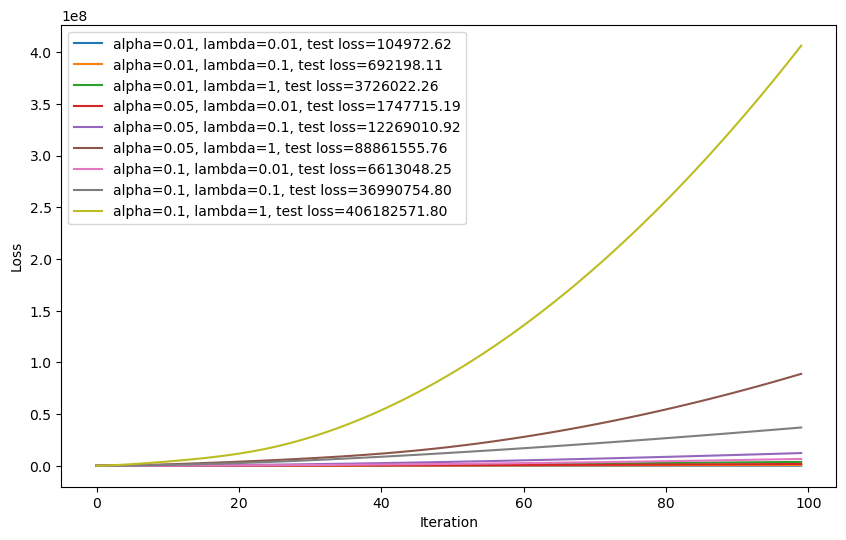

In [12]:
### START CODE HERE ###

# Define the learning rates and regularization constants
learning_rates = [0.01, 0.05, 0.1]
reg_constants = [0.01, 0.1, 1]

# Initialize a figure
plt.figure(figsize=(10, 6))

# Loop over the learning rates and regularization constants
for alpha in learning_rates:
    for regLambda in reg_constants:
        # Train the model and get the loss history
        theta, loss_history = fit(X_train, Y_train, regLambda=regLambda, alpha=alpha)

        # Predict the labels for the test data
        Y_pred = predict(X_test, theta)

        # Compute the loss for the test data
        test_loss = computeCost(theta, X_test, Y_test, regLambda)

        # Plot the loss history
        plt.plot(loss_history, label=f'alpha={alpha}, lambda={regLambda}, test loss={test_loss:.2f}')

# Add labels and legend to the plot
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()

# Show the plot
plt.show()

### END CODE HERE ###

## Naive Bayes

In this part, you will use the `GaussianNB` classifier to classify the data. You should not change the default parameters of this classifier. First, train the classifier on the training set and then find the accuracy of it on the test set.

**Question**: What is the accuracy of this method on test set?

**Answer**: 93.87%

In [13]:
### START CODE HERE ###

# Initialize the GaussianNB classifier
clf = GaussianNB()

# Train the classifier on the training set
clf.fit(X_train, Y_train)

# Predict the labels for the test data
Y_pred = clf.predict(X_test)

# Compute the accuracy of the classifier on the test data
accuracy = accuracy_score(Y_test, Y_pred)

# Print the accuracy
print(f"Accuracy: {accuracy * 100:.2f}%")

### END CODE HERE ###

Accuracy: 93.87%


## LDA (Linear Discriminant Analysis)

In this part, you will use the `LinearDiscriminantAnalysis` classifier to classify the data. You should not change the default parameters of this classifier. First, train the classifier on the training set and then find the accuracy of it on the test set.

**Question**: What is the accuracy of this method on test set?

**Answer**: 98.93%

In [14]:
# Initialize the LinearDiscriminantAnalysis classifier
clf = LinearDiscriminantAnalysis()

# Train the classifier on the training set
clf.fit(X_train, Y_train)

# Predict the labels for the test data
Y_pred = clf.predict(X_test)

# Compute the accuracy of the classifier on the test data
accuracy = accuracy_score(Y_test, Y_pred)

# Print the accuracy
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 98.93%


## Conclusion

**Question**: What is the best method for classifying this dataset? What is the best accuracy on the test set?

**Answer**: LDA is better for this dataset, as the features do not seem to be independant. The best accuracy is 98.93%.